<a href="https://colab.research.google.com/github/mazg-95/text-mining-image-processing/blob/main/Lab1_21000546.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1
## Algoritmo de Canny
## Text Mining and Image Recognition
---
#### Marco Antonio Zuñiga Guzman
#### Carne: 21000546

In [170]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt


In [171]:
def convolutional_filter(imagen, kernel):
  alto, ancho = imagen.shape
  altoKernel = len(kernel[:,0])
  anchoKernel = len(kernel[0,:])
  #parte entera del centro del kernel
  step = int(len(kernel[0,:])/2)
  newImg = np.zeros((alto, ancho, 1))
  for i in range(step, alto - step):
    newPixel = 0
    for j in range(step, ancho - step):
      ventana = imagen[i-step:i+2*step, j-step:j+2*step]
      newPixel = 0
      for m in range(0, altoKernel):
        for n in range(0, anchoKernel):
          newPixel = newPixel + ventana[m, n] * kernel[m, n]
          newImg[i, j] = int(newPixel)
  return newImg

def derivadaX(img):
  # p[i+1, j] - p[i,j]
  alto, ancho = img.shape[0], img.shape[1]
  DX = np.zeros((alto, ancho))
  for i in range(alto):
    for j in range(ancho - 1):
      DX[i,j] = img[i, j+1] - img[i, j]
  return DX

def derivadaY(img):
  # p[i, j+1] - p[i,j]
  alto, ancho = img.shape[0], img.shape[1]
  DY = np.zeros((alto, ancho))
  for i in range(alto - 1):
    for j in range(ancho):
      DY[i,j] = img[i + 1, j] - img[i, j]
  return DY

def magnitud(dx, dy):
  # sqrt(dx ** 2 + dy ** 2)
  alto, ancho = img.shape[0], img.shape[1]
  magnitud = np.zeros((alto, ancho))
  for i in range(0, alto):
    for j in range(0, ancho):
      magnitud[i,j] = math.sqrt(dx[i,j] ** 2 + dy[i,j] ** 2)
  return magnitud

def fase(dx, dy):
  # atan2(dx, dy)
  alto, ancho = img.shape[0], img.shape[1]
  fase = np.zeros((alto, ancho))
  for i in range(0, alto):
    for j in range(0, ancho):
      fase[i,j] = int((180 / math.pi) * math.atan2(dy[i,j], dx[i,j]))
  return fase 


def non_maximum_suppression(magImage, phaseImage):
  alto, ancho = img.shape[0], img.shape[1]
  newImg = np.zeros((alto, ancho))
  val1 = val2 = val3 = 0
  alpha = 0.1
  for i in range(1, alto - 2):
    for j in range(1, ancho - 2):
      ventana = magImage[i-1:i+2, j-1:j+2]
      angulo = phaseImage[i, j]
      vDerecha = magImage[i - 1, j]
      vIzquierda = magImage[i + 1, j]
      if (((angulo > 337) or (angulo <= 23)) or ((angulo >= 157) and (angulo <= 203))):
        val1, val2, val3  = ventana[1,0], ventana[1,1], ventana[1,2]
      elif (((angulo > 23) and (angulo <= 67)) or ((angulo > 203) and (angulo <= 248))):
        val1, val2, val3 = ventana[0,2], ventana[1,1], ventana[2,0]
      elif (((angulo > 67) and (angulo <= 113)) or ((angulo > 248) and (angulo <= 293))):
        val1, val2, val3 = ventana[0,1], ventana[1,1], ventana[2,1]
      elif (((angulo > 293) and (angulo <= 337)) or ((angulo > 113) and (angulo <= 157))):
        val1, val2, val3 = ventana[0,0], ventana[1,1], ventana[2,2]

      if ((val2 >= val1) and (val2 >= val3)):
        newImg[i, j] = val2
        #newImg[i,j] = alpha*val1 + (1-alpha)*val3
        #newImg[i, j] = 255
      else:
        newImg[i, j] = 0
  return newImg

def threshhold(img):
  return (img > 12) * 255


True

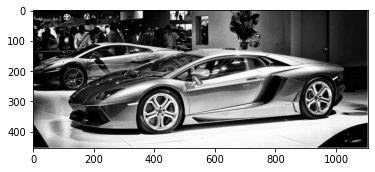

In [172]:
## Paso -1: Escala de Grises
img = cv2.imread('/content/drive/MyDrive/Cursos/Data Science/Ciclo3/Text Mining and Image Processing/Lab1/car.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
cv2.imwrite("orginal.jpg", img)

In [173]:
## Paso 0: Filtro Gausiano
kernel = np.array([[1/16, 2/16, 1/16], [2/16, 4/16, 2/16], [1/16, 2/16, 1/16]])
blur = convolutional_filter(gray, kernel)
cv2.imwrite("blur.jpg", blur)

True

True

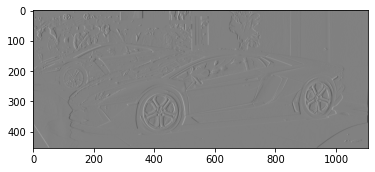

In [174]:
## DX
dx = derivadaX(blur)
plt.imshow(dx, cmap="gray")
cv2.imwrite("dx.jpg", dx)

True

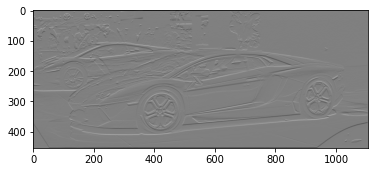

In [175]:
## DY
dy = derivadaY(blur)
plt.imshow(dy, cmap="gray")
cv2.imwrite("dy.jpg", dy)

True

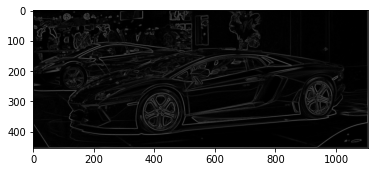

In [176]:
## Magnitud
m = magnitud(dx, dy)

plt.imshow(m, cmap="gray")
cv2.imwrite("mag.jpg", m)

True

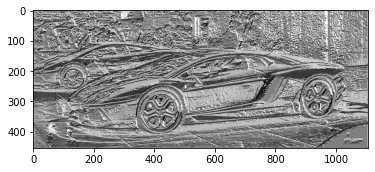

In [177]:
fase_img = fase(dx, dy)
plt.imshow(fase_img, cmap="gray")
cv2.imwrite("fase.jpg", fase_img)

True

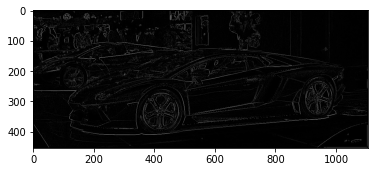

In [178]:
nms = non_maximum_suppression(m, fase_img)
plt.imshow(nms, cmap="gray")
cv2.imwrite("nms.jpg", nms)

True

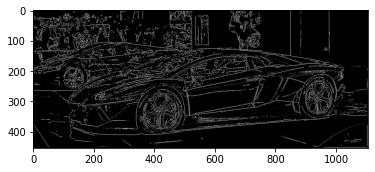

In [179]:
final = threshhold(nms)
plt.imshow(final, cmap="gray")
cv2.imwrite("final.jpg", final)

True

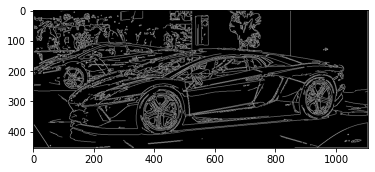

In [180]:
edges = cv2.Canny(gray, 100, 200)
plt.imshow(edges, cmap="gray")
cv2.imwrite("canny.jpg", edges)